In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
import seaborn as sns

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
shapiro_test = stats.shapiro(df['Glucose'])
print("shapiro-Wilk p-value:", shapiro_test.pvalue)

shapiro-Wilk p-value: 1.9863474999979633e-11


In [11]:
if shapiro_test.pvalue < 0.05:
    print("Data is NOT notmally distributed")
else:
    print("Data IS normally distributed")

Data is NOT notmally distributed


Generate a Q-Q plot for the sample means

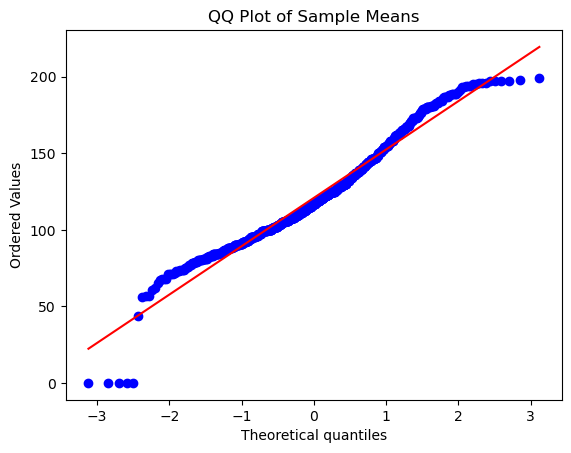

In [12]:
stats.probplot(df['Glucose'], dist="norm", plot=plt)
plt.title('QQ Plot of Sample Means')
plt.show()

Central Limit Theorem

In [13]:
sample_means = []
n_samples = 100
sample_size = 30

for i in range(n_samples):
    sample = df['Glucose'].sample(n=sample_size, replace=True)
    sample_means.append(sample.mean())


Plot distribution of samplemeans

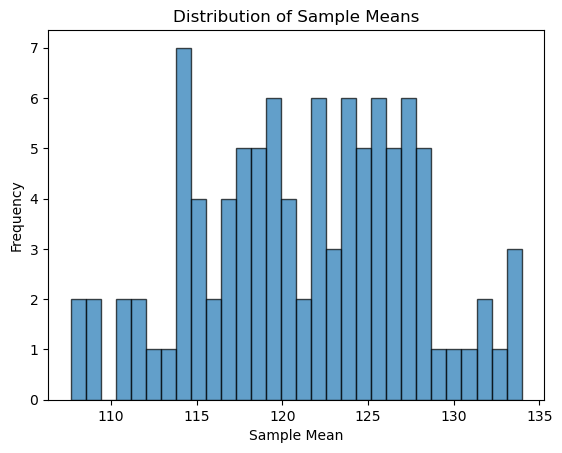

In [14]:
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

Generate a Q-Q plot for the sample means

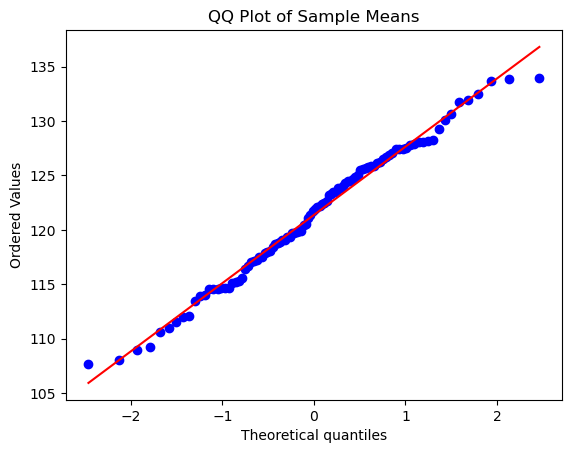

In [16]:
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title('QQ Plot of Sample Means')
plt.show()

Perform the Shapiro-Wilk test on the sample means.

In [18]:
shapiro_test = stats.shapiro(sample_means)
print("shapiro-Wilk p-value:", shapiro_test.pvalue)

shapiro-Wilk p-value: 0.3397134702733624


Interpret the result

In [19]:
if shapiro_test.pvalue < 0.05:
    print("The data likely does not follow a normal distribution")
else:
    print("The data may be normally distributed, but the q-q plot can provide further insights")

The data may be normally distributed, but the q-q plot can provide further insights
